In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
import tensorflow as tf

def eval_plot(file):
    return get_section_results(file, 'Eval_AverageReturn')

def get_section_results(file, s):
    eval_returns = []
    for e in tf.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == s:
                eval_returns.append(v.simple_value)
    return eval_returns

/home/kevin/miniconda3/envs/cs285/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kevin/miniconda3/envs/cs285/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kevin/miniconda3/envs/cs285/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/kevin/miniconda3/envs/cs285/lib/python3.6/s

In [23]:
def for_section (question):
    experiments = os.listdir('data')
    rv = {}
    for exp in experiments:
        if exp[:len(question)] == question:
            exp_fn = 'data/' + os.path.join (exp, os.listdir('data/' + exp)[0])
            print (exp)
            eval_avg_return = get_section_results (exp_fn, 'Eval_AverageReturn')
            eval_std_return = get_section_results (exp_fn, 'Eval_StdReturn')
            rv[exp] = (eval_avg_return, eval_std_return)
    return rv

In [24]:
def plot_section (exp_dict, s, title, s_pass=False): # plot
    plt.title(title)
    plt.xlabel('iterations')
    plt.ylabel('mean eval return')
    for key in exp_dict.keys():
        if key[3:5] == s or s_pass: # 'sb' or 'lb'
            plt.plot (exp_dict[key][0], label=key)
    plt.legend()
    plt.show()

In [25]:
def plot_single (exp, title):
    plt.title(title)
    plt.xlabel('iterations')
    plt.ylabel('mean eval return')
    plt.plot (exp)
    plt.show()

In [26]:
plt.rcParams['figure.figsize'] = 8, 6

# q1

In [27]:
rv = for_section ('q1')

q1_sb_no_rtg_dsa_CartPole-v0
q1_lb_rtg_na_CartPole-v0
q1_sb_rtg_dsa_CartPole-v0
q1_lb_no_rtg_dsa_CartPole-v0
q1_sb_rtg_na_CartPole-v0
q1_lb_rtg_dsa_CartPole-v0


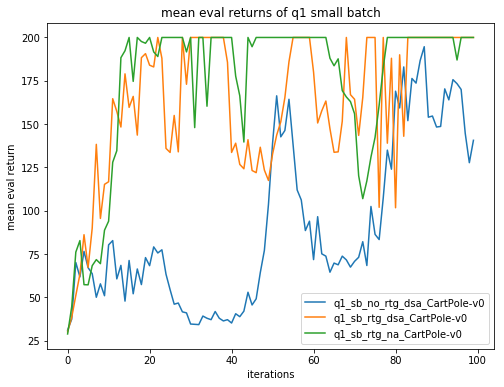

In [28]:
plot_section (rv, 'sb', 'mean eval returns of q1 small batch')

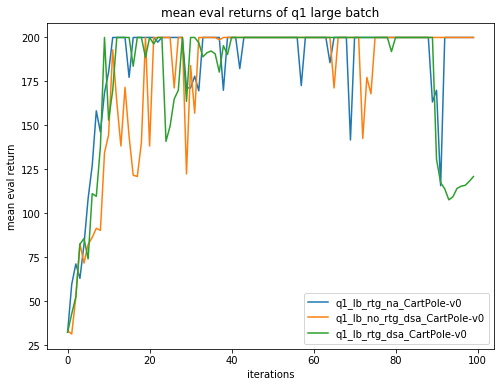

In [29]:
plot_section (rv, 'lb', 'mean eval returns of q1 large batch')

**–Which value estimator has better performance without advantage-standardization:  the trajectory-centric one, or the one using reward-to-go?**

The reward-to-go value estimator did much better

**–Did advantage standardization help?**

Advantage standardization did not speed up the time to reach the convergence value, but helped the mean eval returns stay more consistent.

**–Did the batch size make an impact?**

The larger batch size greatly increased the rate of convergence and the consistency at convergence

# q2

python cs285/scripts/run_hw2.py --env_name InvertedPendulum-v2 \
--ep_len 1000 --discount 0.9 -n 100 -l 2 -s 64 -b 70 -lr .009 -rtg \
--exp_name q2_b70_r.009

In [11]:
rv2 = for_section ('q2')

q2_b70_r.009_InvertedPendulum-v2_27-09-2020_22-46-26
q2_b70_r.009_InvertedPendulum-v2_27-09-2020_22-47-41


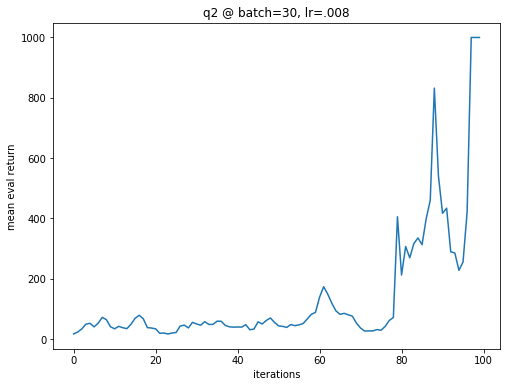

In [12]:
plot_single (rv2['q2_b70_r.009_InvertedPendulum-v2_27-09-2020_22-46-26'][0], 'q2 @ batch=30, lr=.008')

# q3

In [13]:
rv3 = for_section ('q3')

q3_b40000_r0.005_LunarLanderContinuous-v2_27-09-2020_22-56-04
q3_b40000_r0.005_LunarLanderContinuous-v2_27-09-2020_22-54-38
q3_b40000_r0.005_LunarLanderContinuous-v2_27-09-2020_22-53-30


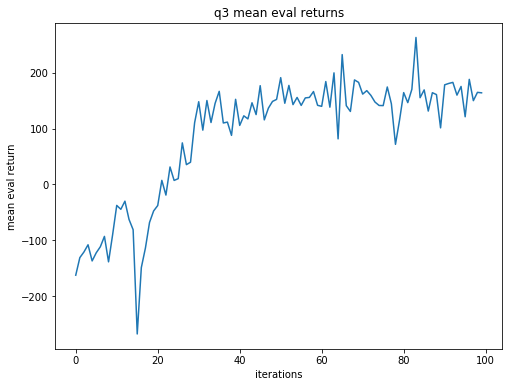

In [14]:
plot_single (rv3['q3_b40000_r0.005_LunarLanderContinuous-v2_27-09-2020_22-56-04'][0], 'q3 mean eval returns')

# q4

python cs285/scripts/run_hw2.py --env_name HalfCheetah-v2 --ep_len 150 \
--discount 0.95 -n 100 -l 2 -s 32 -b 30000 -lr 0.01 -rtg --nn_baseline \
--exp_name q4_search_b30000_lr0.01_rtg_nnbaseline

In [33]:
rv4 = for_section ('q4_s')

q4_search_b50000_lr0.02_rtg_nnbaseline_HalfCheetah-v2_28-09-2020_01-53-00
q4_search_b30000_lr0.01_rtg_nnbaseline_HalfCheetah-v2_28-09-2020_00-47-02
q4_search_b30000_lr0.005_rtg_nnbaseline_HalfCheetah-v2_28-09-2020_00-22-54
q4_search_b50000_lr0.01_rtg_nnbaseline_HalfCheetah-v2_28-09-2020_01-11-17


In [34]:
plt.rcParams['figure.figsize'] = 10, 7

## q4a

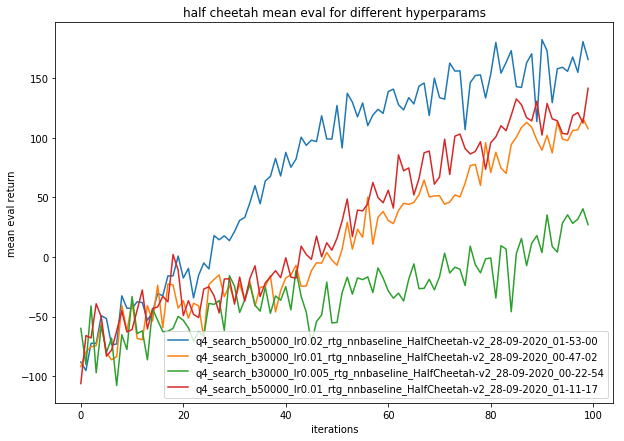

In [35]:
plot_section (rv4, '', 'half cheetah mean eval for different hyperparams', True)

Increasing the learning rate and the batch size increased the mean eval return

## q4b

python cs285/scripts/run_hw2.py --env_name HalfCheetah-v2 --ep_len 150 \--discount 0.95 -n 100 -l 2 -s 32 -b 50000 -lr .02 \--exp_name q4_b50000_r0.02

python cs285/scripts/run_hw2.py --env_name HalfCheetah-v2 --ep_len 150 \--discount 0.95 -n 100 -l 2 -s 32 -b 50000 -lr .02 -rtg \--exp_name q4_b50000_r0.02_rtg

python cs285/scripts/run_hw2.py --env_name HalfCheetah-v2 --ep_len 150 \--discount 0.95 -n 100 -l 2 -s 32 -b 50000 -lr .02 --nn_baseline \--exp_name q4_b50000_r0.02_nnbaseline

python cs285/scripts/run_hw2.py --env_name HalfCheetah-v2 --ep_len 150 \--discount 0.95 -n 100 -l 2 -s 32 -b 50000 -lr .02 -rtg --nn_baseline \--exp_name q4_b50000_r0.02_rtg_nnbaseline

In [36]:
rv4b = for_section ('q4_b')

q4_b50000_r0.02_rtg_HalfCheetah-v2_28-09-2020_02-34-34
q4_b50000_r0.02_nnbaseline_HalfCheetah-v2_28-09-2020_02-37-16
q4_b50000_r0.02_rtg_nnbaseline_HalfCheetah-v2_28-09-2020_02-38-41
q4_b50000_r0.02_HalfCheetah-v2_28-09-2020_02-33-13


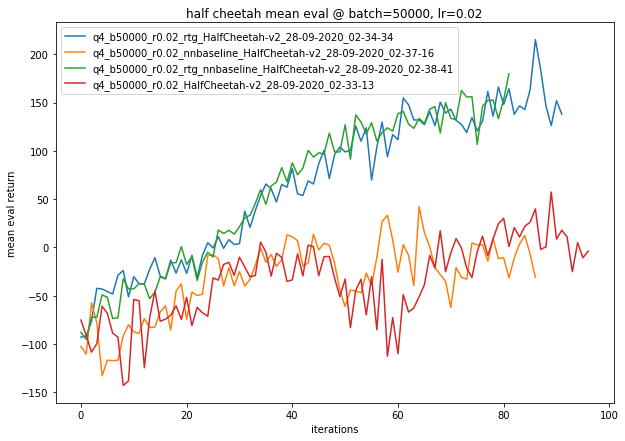

In [38]:
plot_section (rv4b, '', 'half cheetah mean eval @ batch=50000, lr=0.02', True)